Fold 1 Model Summary:
                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstimatedDayofOvulation
No. Observations: 2399    Method:             REML                   
No. Groups:       18      Scale:              6.6320                 
Min. group size:  4       Log-Likelihood:     -5703.9018             
Max. group size:  488     Converged:          Yes                    
Mean group size:  133.3                                              
----------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept               10.668     1.910  5.586  0.000   6.925  14.411
LengthofCycle            0.153     0.066  2.336  0.020   0.025   0.282
LengthofLutealPhase      0.055     0.030  1.827  0.068  -0.004   0.114
Group Var                2.033     0.322                              



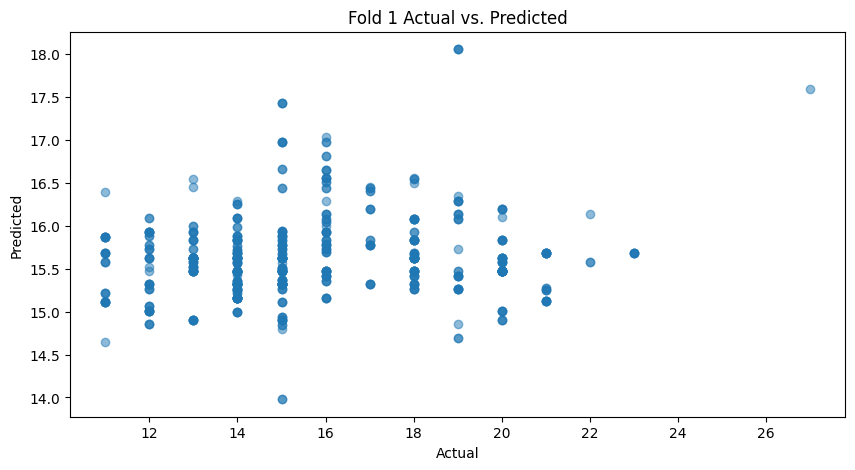

Fold 2 Model Summary:
                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstimatedDayofOvulation
No. Observations: 2399    Method:             REML                   
No. Groups:       18      Scale:              6.5827                 
Min. group size:  7       Log-Likelihood:     -5694.5139             
Max. group size:  492     Converged:          Yes                    
Mean group size:  133.3                                              
----------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept               10.308     1.857  5.551  0.000   6.668  13.948
LengthofCycle            0.174     0.064  2.729  0.006   0.049   0.300
LengthofLutealPhase      0.031     0.032  0.975  0.329  -0.031   0.094
Group Var                1.939     0.310                              



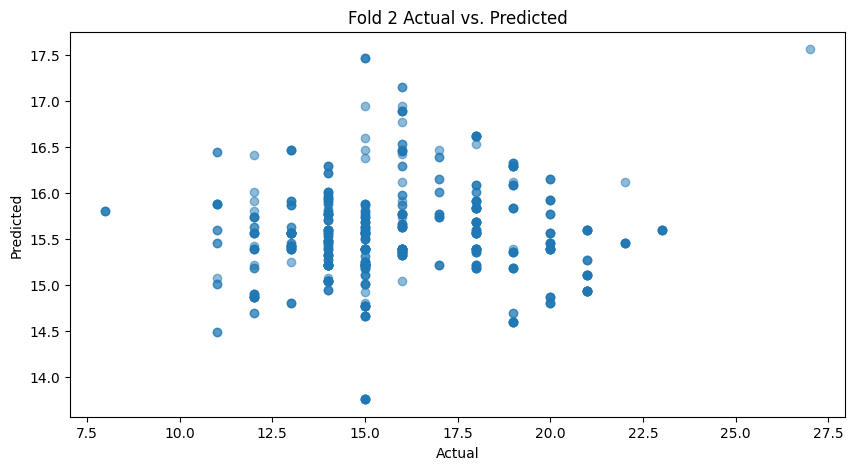

Fold 3 Model Summary:
                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstimatedDayofOvulation
No. Observations: 2399    Method:             REML                   
No. Groups:       18      Scale:              6.8072                 
Min. group size:  5       Log-Likelihood:     -5733.5333             
Max. group size:  512     Converged:          Yes                    
Mean group size:  133.3                                              
----------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept               10.879     1.801  6.042  0.000   7.350  14.408
LengthofCycle            0.146     0.062  2.348  0.019   0.024   0.268
LengthofLutealPhase      0.055     0.032  1.744  0.081  -0.007   0.117
Group Var                1.743     0.282                              



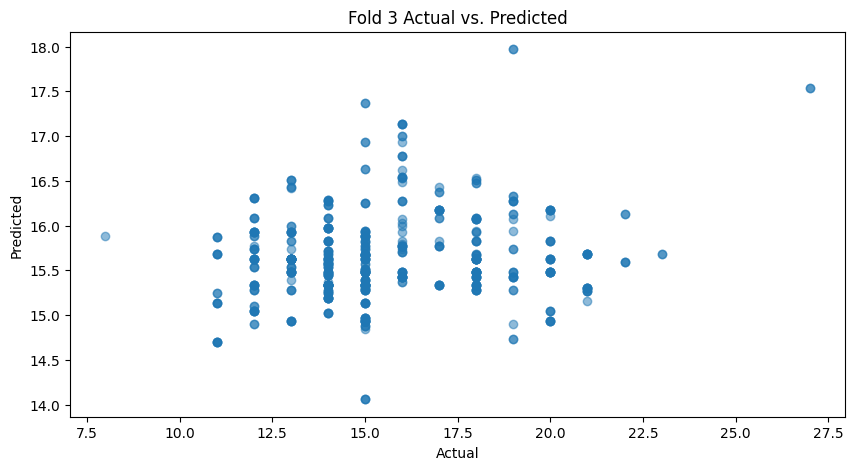

Fold 4 Model Summary:
                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstimatedDayofOvulation
No. Observations: 2399    Method:             REML                   
No. Groups:       18      Scale:              6.7568                 
Min. group size:  6       Log-Likelihood:     -5725.1353             
Max. group size:  487     Converged:          Yes                    
Mean group size:  133.3                                              
----------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept               10.396     1.812  5.737  0.000   6.844  13.948
LengthofCycle            0.150     0.062  2.408  0.016   0.028   0.273
LengthofLutealPhase      0.076     0.032  2.418  0.016   0.014   0.138
Group Var                1.812     0.289                              



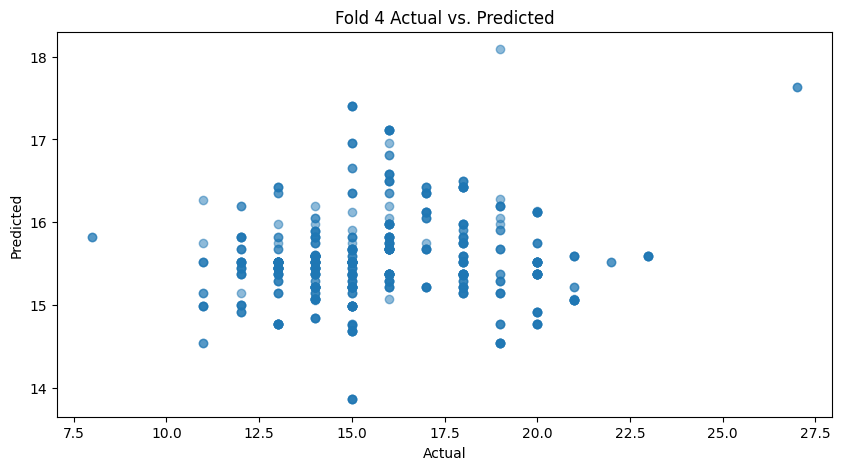

Fold 5 Model Summary:
                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: EstimatedDayofOvulation
No. Observations: 2400    Method:             REML                   
No. Groups:       18      Scale:              6.7335                 
Min. group size:  6       Log-Likelihood:     -5722.8233             
Max. group size:  493     Converged:          Yes                    
Mean group size:  133.3                                              
----------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept               10.882     1.775  6.130  0.000   7.403  14.361
LengthofCycle            0.146     0.061  2.383  0.017   0.026   0.266
LengthofLutealPhase      0.054     0.031  1.699  0.089  -0.008   0.115
Group Var                1.697     0.278                              



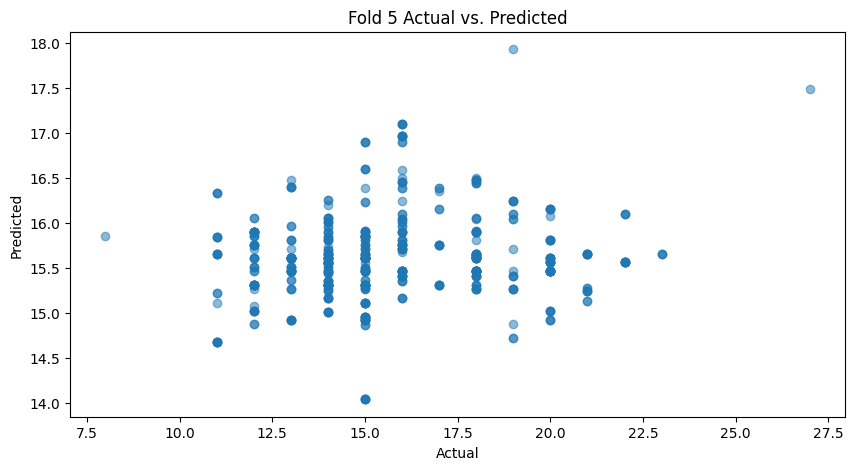

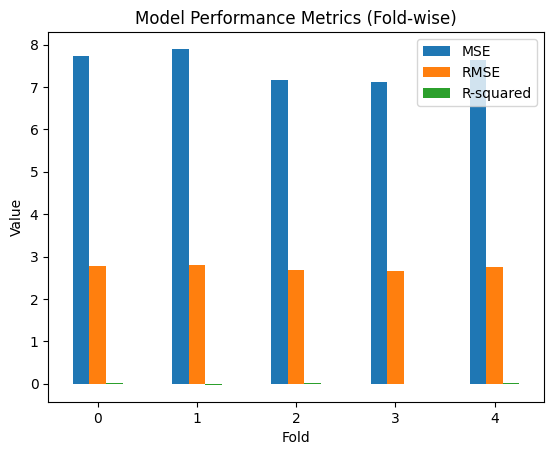

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


data = pd.read_csv('/content/ovulation_dataset.csv')

target_variable = 'EstimatedDayofOvulation'

fixed_effects = ['LengthofCycle', 'LengthofLutealPhase']
random_effect = 'LengthofCycle'


mse_list = []
rmse_list = []
r2_list = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(data)):
    train_data = data.iloc[train_idx]
    test_data = data.iloc[test_idx]

    model = sm.MixedLM.from_formula(f"{target_variable} ~ {' + '.join(fixed_effects)}", data=train_data, groups=train_data[random_effect])
    result = model.fit()

    print(f"Fold {fold + 1} Model Summary:")
    print(result.summary())

    y_true = test_data[target_variable]
    y_pred = result.predict(test_data)

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Fold {fold + 1} Actual vs. Predicted")
    plt.show()

metrics_df = pd.DataFrame({'MSE': mse_list, 'RMSE': rmse_list, 'R-squared': r2_list})
metrics_df.plot(kind='bar', rot=0, title='Model Performance Metrics (Fold-wise)')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.show()


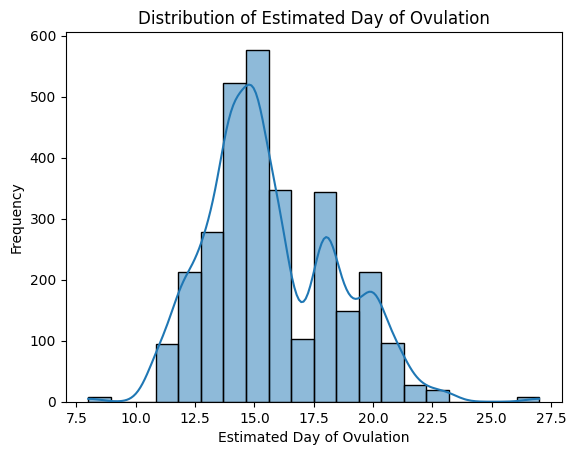

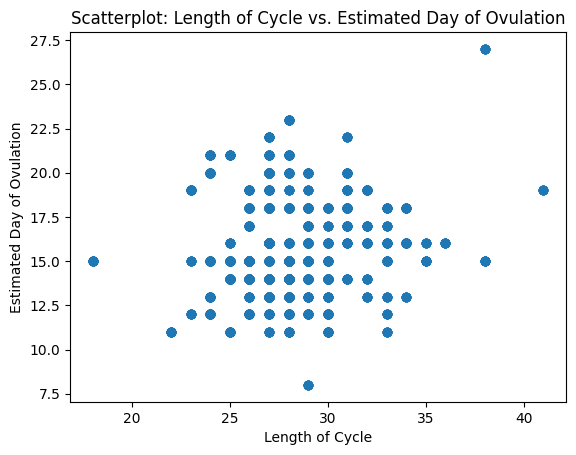

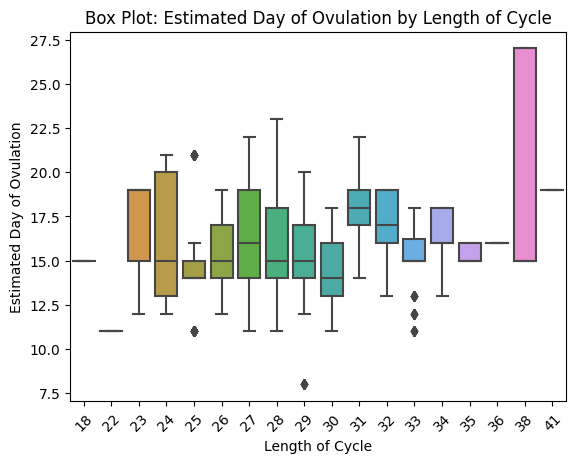

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data["EstimatedDayofOvulation"], bins=20, kde=True)
plt.xlabel("Estimated Day of Ovulation")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated Day of Ovulation")
plt.show()

plt.scatter(data["LengthofCycle"], data["EstimatedDayofOvulation"])
plt.xlabel("Length of Cycle")
plt.ylabel("Estimated Day of Ovulation")
plt.title("Scatterplot: Length of Cycle vs. Estimated Day of Ovulation")
plt.show()

sns.boxplot(x="LengthofCycle", y="EstimatedDayofOvulation", data=data)
plt.xlabel("Length of Cycle")
plt.ylabel("Estimated Day of Ovulation")
plt.title("Box Plot: Estimated Day of Ovulation by Length of Cycle")
plt.xticks(rotation=45)
plt.show()




In [ ]:
for fold, (mse, rmse, r2) in enumerate(zip(mse_scores, rmse_scores, r2_scores), 1):
    print(f"Fold {fold}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print("-" * 30)


Fold 1:
MSE: 7.705418163476241
RMSE: 2.77586349871103
R-squared: 0.015066646149301088
------------------------------
Fold 2:
MSE: 7.737876961438392
RMSE: 2.7817039672543142
R-squared: -0.007580158896501654
------------------------------
Fold 3:
MSE: 7.186011429211478
RMSE: 2.6806736894317216
R-squared: 0.015129182992780432
------------------------------
Fold 4:
MSE: 7.0240720480063885
RMSE: 2.650296596233408
R-squared: 0.011343512113013321
------------------------------
Fold 5:
MSE: 7.606694020054682
RMSE: 2.758023571337758
R-squared: 0.012661688502421997
------------------------------


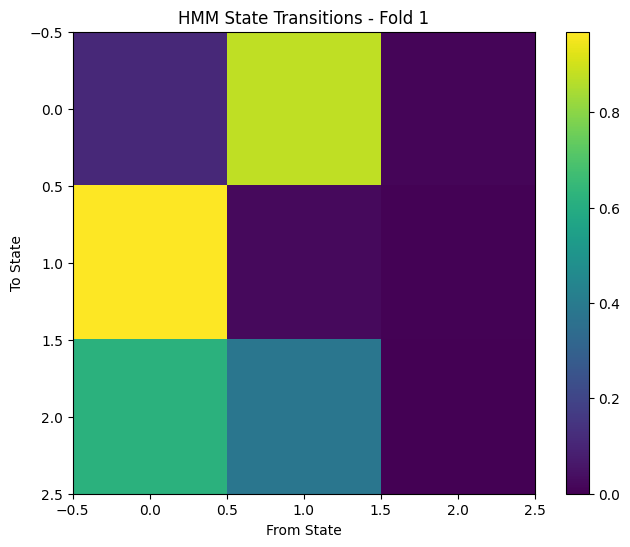

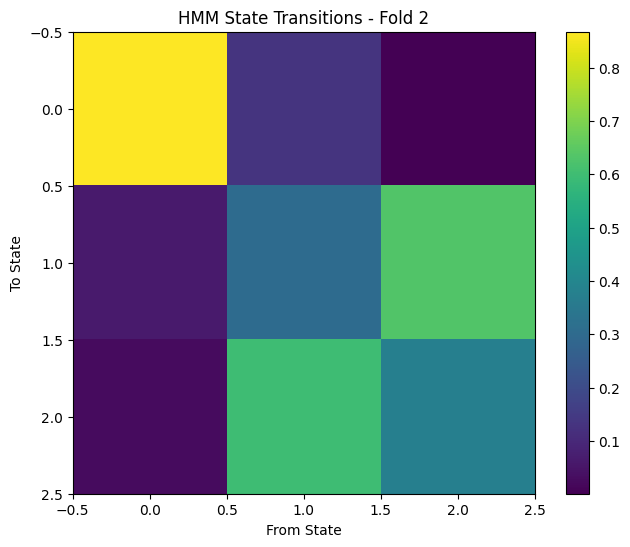

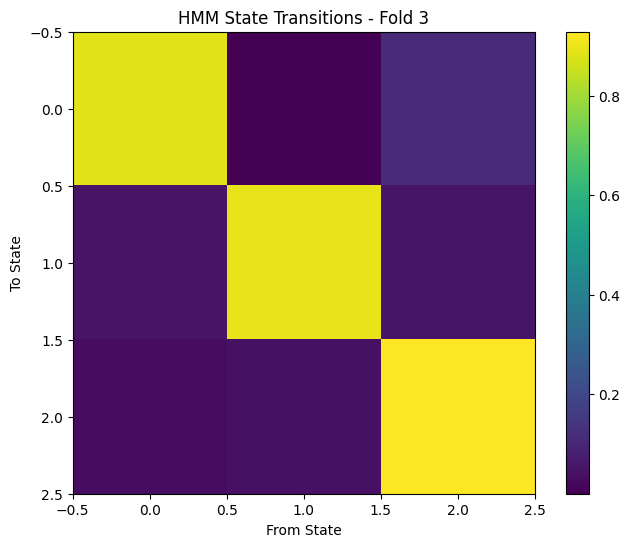

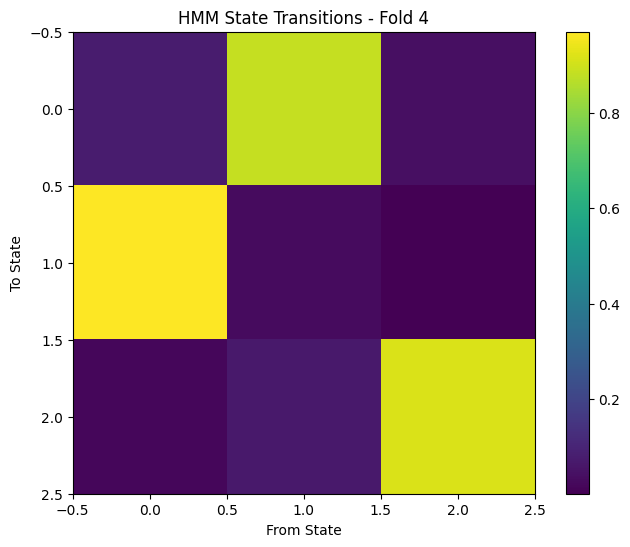

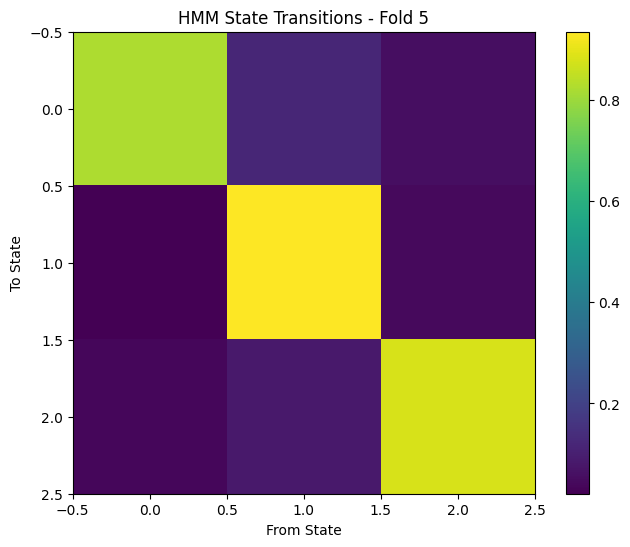

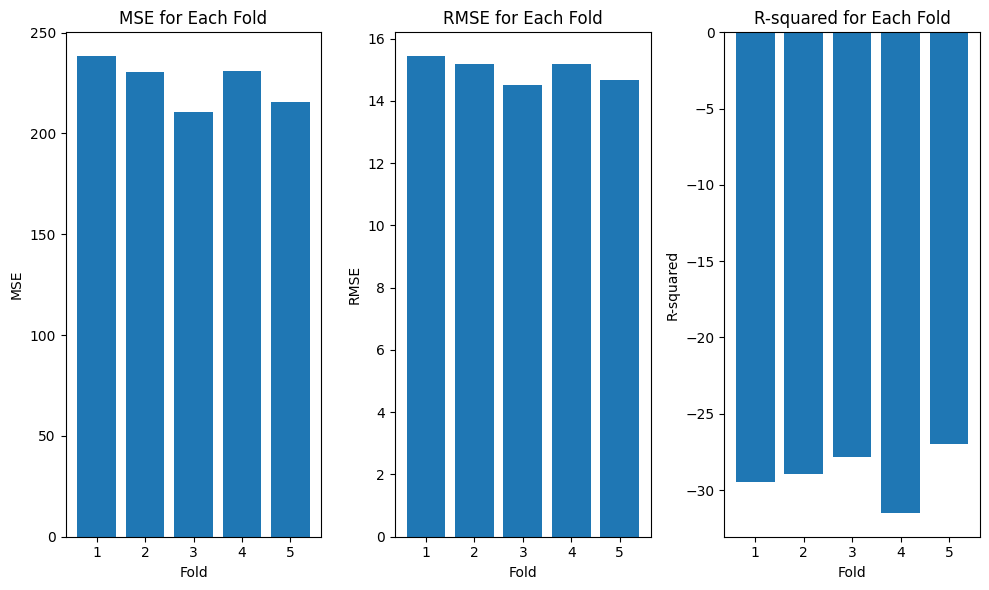

In [ ]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X = data[['LengthofCycle', 'LengthofLutealPhase']].values
y = data['EstimatedDayofOvulation'].values

n_states = 3
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full")


kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    model.fit(X_train)
    predicted_y = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.title(f'HMM State Transitions - Fold {len(mse_scores) + 1}')
    plt.imshow(model.transmat_, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xlabel('From State')
    plt.ylabel('To State')
    plt.show()

    mse = mean_squared_error(y_test, predicted_y)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predicted_y)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
plt.figure(figsize=(10, 6))
metrics = ['MSE', 'RMSE', 'R-squared']
scores = [mse_scores, rmse_scores, r2_scores]

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(range(1, 6), scores[i])
    plt.xlabel('Fold')
    plt.ylabel(metric)
    plt.title(f'{metric} for Each Fold')

plt.tight_layout()
plt.show()


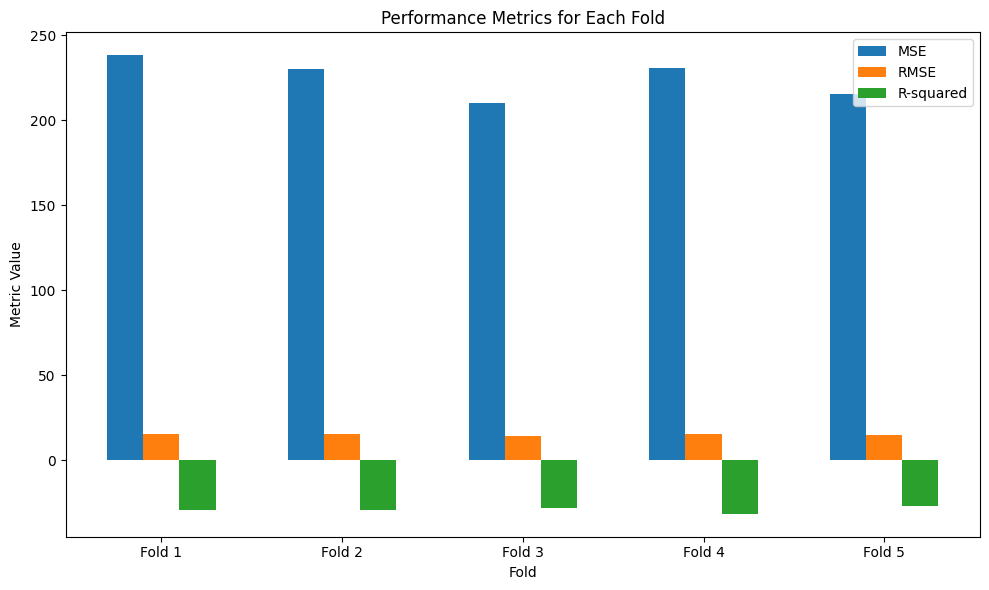

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(np.arange(5) - 0.2, mse_scores, width=0.2, label='MSE')
plt.bar(np.arange(5), rmse_scores, width=0.2, label='RMSE')
plt.bar(np.arange(5) + 0.2, r2_scores, width=0.2, label='R-squared')

plt.xlabel("Fold")
plt.ylabel("Metric Value")
plt.title("Performance Metrics for Each Fold")
plt.xticks(np.arange(5), [f"Fold {i+1}" for i in range(5)])
plt.legend()
plt.tight_layout()
plt.show()